# MAE 3120
## HW 02

Due 03/02

In [3]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

### 1

The function:
\begin{align*}
f(t) = 1.5 + 0.366\cos(2 \pi t) + 0.173\cos( 10 \pi t) - 0.909\cos( 14 \pi t) 
\end{align*}

It is now sampled at 4.9 Hz and 2048 points are acquired.

(a) Is there aliasing on any of the harmonics?  If so which harmonic(s)?

-> the maximum frequency that can be sampled without aliasing is < 2.45 Hz.  The 5 and 7 Hz harmonics will be aliased. They will appear respectively at 0.1 and 2.1 Hz.

(b) Plot the spectrum.

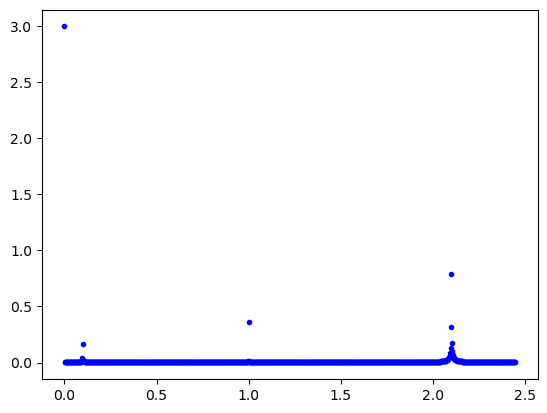

In [4]:
f_s = 4.9 # Hz
N = 2048 # # points
T_s = N/f_s # s

timestep = T_s/N # time increment (s)
t = np.arange(0,T_s,timestep) # time vector
y_t = 1.5+0.366*np.cos(2*np.pi*t)+0.173*np.cos(10*np.pi*t)-0.909*np.cos(14*np.pi*t)
sp = np.fft.fft(y_t) # compute FFT 

k = np.arange(int(N))
frq = k/T_s # two sides frequency range
frq = frq[range(int(N/2))] # one side frequency range
sp1 = sp[range(int(N/2))]

pyplot.plot(frq,abs(sp1)*2/N,'b.'); # plotting the spectrum

(c) Plot the original signal and the apparent signal after being sampled (use the inverse FFT to reconstruct the aliased signal in the time domain).  

Text(0, 0.5, 'Aliased signal')

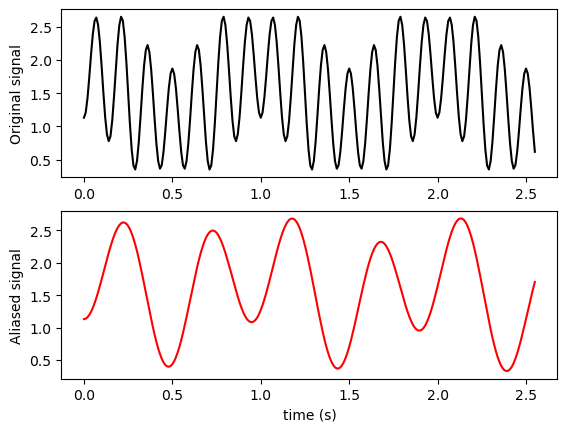

In [5]:
# Note: here I changed the sampling parameters to better see the signal in the time domain.

f_s = 100 # Hz
N = 256 # # points
T_s = N/f_s # st = np.arange(0,T_s/10,timestep/10) # time vector
timestep = T_s/N # time increment (s)
t = np.arange(0,T_s,timestep) # time vector

y_t = 1.5+0.366*np.cos(2*np.pi*t)+0.173*np.cos(10*np.pi*t)-0.909*np.cos(14*np.pi*t)
y_td = 1.5+0.366*np.cos(2*np.pi*t) +0.173*np.cos(2*np.pi*0.1*t)-0.909*np.cos(2*np.pi*2.1*t) # distorted signal

fig, ax = pyplot.subplots(2, 1)
ax[0].plot(t, y_t, 'k-') # plotted less points to see the signal better
#ax[0].set_xlabel('Time')
ax[0].set_ylabel('Original signal')
ax[1].plot(t, y_td, 'r-') 
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('Aliased signal')

#pyplot.plot(t[0:50], y_t[0:50], 'k-');

(d) Which term would you use to describe how the sampled signal looks like with respect to the original?

-> The apparent signal is significantly different or distorted.

### 2

A signal contains a frequency component at 50,000 Hz with amplitude 0.20 V, but there is also noise in the signal at 120 Hz, amplitude 0.20 V. The DC offset is negligible. The data are acquired with an ADC with the following parameters: input range $\pm 10$ V and 12 bit.

(a) What should be the gain of the amplifier stage(s) to make the best use of the ADC?

-> The signal has a carrier signal with A = 0.20 V and f = 50000 Hz. To make the most of the ADC the signal should be within 60-80% of the input range, i.e the gain should be between G = 6/0.5 = 30 and G = 8/0.2 = 40. Here we will select the lowest of the two: G = 30.

(b) Select the sampling frequency (justify why).

We want to capture the carrier signal, which has frequency 50,000 Hz.  To respect Nyquist one needs to sample at > 2x50,000.  Select sampling frequency of at least 100,001 Hz. Here I will select 150,000 Hz to limit risk of GBP issues (we already need a high gain).

(c) What type of filter will you use to filter out the noise?

-> noise is at 120 Hz and signal at 50,000 Hz.  Use high pass filter.

(d) Select the appropriate cutoff frequency and order of the filter, justify all your steps.

In [11]:
#select cutoff frequency between 1,200 and 5,000 Hz. Here select middle value: 2500 Hz
f_c = 2500
f_noise = 120
A_noise = 0.5
G = 30

# we want the amplitude of the filtered (and amplified) noise to be the same than the quantization error of the ADC
Q = (10-(-10))/2**(12+1)
print(Q, ' V')

A_noise_filt = A_noise/np.sqrt(1+(f_c/f_noise)**(2*2))
print(A_noise_filt)
# second order high pass filter is adequate.
# we could also check the value of the phase of the carrier frequency, but we are likely good.

0.00244140625  V
0.0011519969423645574


(e) How many amplifier stages will you select to build the amplifier?

In [16]:
# We need a high frequency sampling rate, so the GBP has to be considered very carefully.
# GBP = 1 MHz, B=0.15 MHz, so the max gain we can have is G=6
# if we aim for a total gain of 30, I would recommend two stages of gain sqrt(30)
print('G per stage = ', np.sqrt(30))

G per stage =  5.477225575051661


### 3  

(a) How do you detect clipping in your data?

-> plot of histogram, any data in the smallest or largest bins would be a sign that clipping might be present

(b) When acquiring data, how can make sure that there is no aliasing?

-> monitor the signal spectrum and vary the sampling rate making sure the spectrum does not change.

(c) In a digital data acquisition system, how many bits are necessary to achieve a resolution of 0.1% of full scale?

In [21]:
# resolution is DeltaV, here expressed as a percentage of full scale (ie input range)
N_bit = 10
DeltaV = 1/(2**N_bit)
print(DeltaV*100,'% FS')

0.09765625 % FS


### 4

Select the most appropriate digital data acquisition system between the four options below to record the following signal:
\begin{equation*}
y(t) = 1.1 + 3.9 \sin(20,000 \pi t )
\end{equation*}
For full credit, give a critic of each DAS that support your choice.

(a) 16-bit A/D Converter, range =$\pm10$ V, acquisition rate = 20 kS/s.

(b) 12-bit A/D Converter, range = $\pm 5$ V, acquisition rate = 30 kS/s.

(c) 8-bit A/D Converter, range = $\pm 10$ V, acquisition rate = 500 kS/s.

(d) 16-bit A/D Converter range = $\pm 10$ V, acquisition rate = 100 kS/s.

In [22]:
# need to be able to sample at more than 2x10 kS/s.  -> (a) is not appropriate
# signal will fluctuate between -2.8 and 5 V. Input range of (b) is too small and will lead to clipping
# of the c & d we choose the system with the highest resolution (smallest quantization error)
Qc = 20/2**8
Qd = 20/2**17
print(Qc, Qd)

0.078125 0.000152587890625


We choose (d)